In [37]:
import numpy as np
import pandas as pd 
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
def fun(x, time: np.array, profit: np.array):
            return x[0] + (x[1] + x[2]) * (x[3] / time) * (1 - np.exp(- time / x[3])) - x[2] * np.exp(- time / x[3]) - profit

Times = np.array([0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

Profits = np.array([ 12.66,12.38,11.99,11.64,11.52,11.58,11.70,11.82])

res_lsq = least_squares(fun, np.array([1., 1., 1., 1.]), args=(Times, 100* Profits))

In [60]:
res_lsq

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-5.418e+01 -2.773e+01  8.180e+00  3.699e+01  4.281e+01
                2.443e+01  4.290e-02 -3.054e+01]
           x: [ 3.367e+04 -3.245e+04  3.324e+04 -5.311e+03]
        cost: 4250.772857683251
         jac: [[ 1.000e+00  1.000e+00 -2.353e-05 -2.527e-04]
               [ 1.000e+00  1.000e+00 -4.707e-05 -5.974e-04]
               ...
               [ 1.000e+00  1.001e+00 -6.596e-04 -8.162e-03]
               [ 1.000e+00  1.001e+00 -9.426e-04 -1.167e-02]]
        grad: [-1.539e-04 -1.459e-04  3.771e-06 -1.349e-03]
  optimality: 0.0013489987228190448
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 38
        njev: 24

In [40]:
df = pd.read_csv('Data/FedYeildCurve1DayMonth.csv')

In [41]:
df = df.drop('Unnamed: 0', axis=1)

In [42]:
df.head()

,Month,M3,M6,Y1,Y2,Y3,Y5,Y7,Y10
0,2008-01-01,5.69,5.76,5.88,6.03,6.13,6.26,6.37,6.50
1,2008-02-01,5.13,5.27,5.51,5.81,5.97,6.18,6.31,6.47
2,2008-03-01,5.86,5.94,6.06,6.23,6.35,6.51,6.63,6.78
3,2008-04-01,5.67,5.75,5.88,6.04,6.21,6.48,6.67,6.88
4,2008-05-01,5.74,5.83,5.96,6.17,6.34,6.58,6.76,6.94


In [43]:
beta0 = np.array([])
beta1 = np.array([])
beta2 = np.array([])

In [44]:
p3   = df["M3"].astype(float)
p6   = df["M6"].astype(float)
p12  = df["Y1"].astype(float)
p24  = df["Y2"].astype(float)
p36  = df["Y3"].astype(float)
p60  = df["Y5"].astype(float)
p84  = df["Y7"].astype(float)
p120 = df["Y10"].astype(float)

cs = open('coefs.csv', 'w+')

for i in range(len(p3)):
    Times = np.array([0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

    Profits = np.array([p3[i], p6[i], p12[i], p24[i], p36[i], p60[i], p84[i], p120[i]])

    res_lsq = least_squares(fun, np.array([1., 1., 1., 1.]), args=(Times, 100 * Profits))

    cs.write(str(i)+', '+str(res_lsq.x[0])+', '+str(res_lsq.x[1])+', '+str(res_lsq.x[2])+', '+str(res_lsq.x[3])+'\n')



In [45]:
data = pd.read_csv("Data/coefs.csv")

In [54]:
data.columns

Index(['Unnamed: 0', 'beta0', 'beta1', 'beta2', 'tau'], dtype='object')

In [56]:
data = data.drop(['Unnamed: 0'], axis=1)

In [57]:
data.columns = [r"$\beta_0$", r"$\beta_1$", r"$\beta_2$", r"$\tau$"]

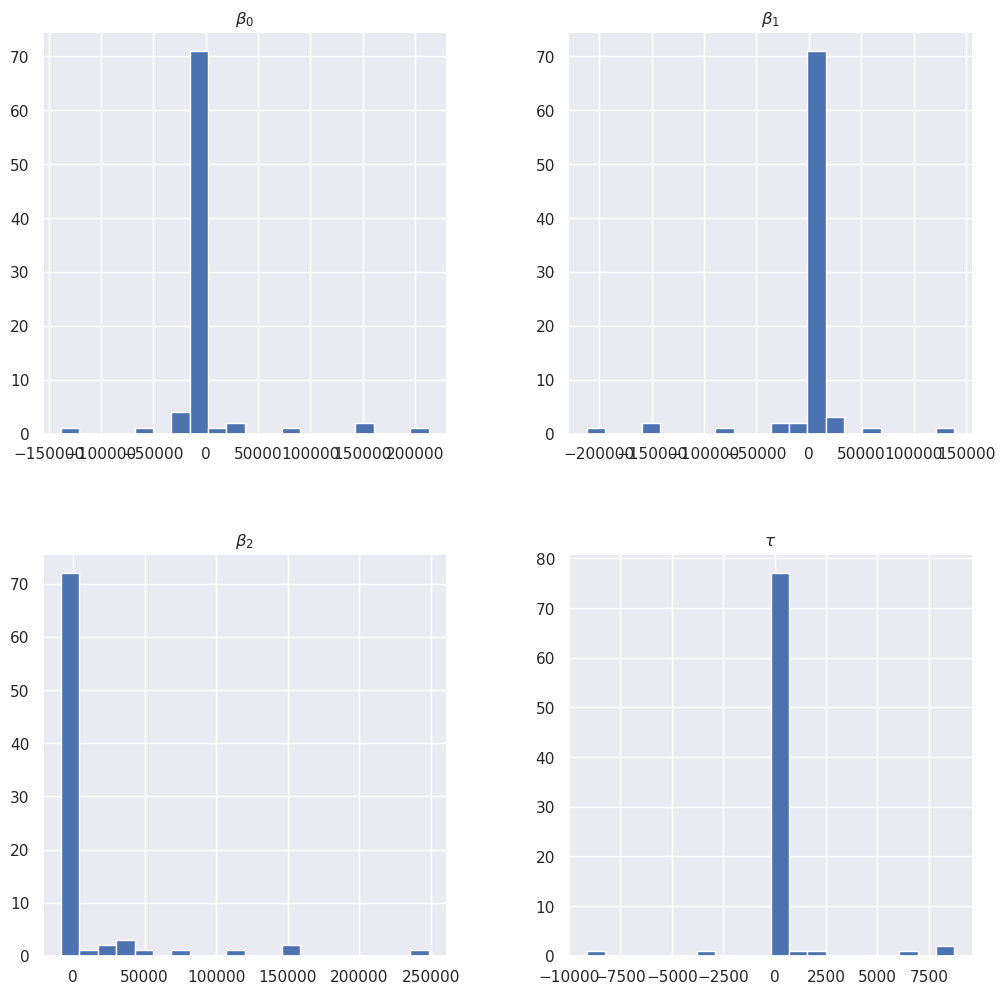

In [58]:
sns.set(rc={"figure.figsize":(12, 12)})
data.iloc[:, :].hist(figsize=(12, 12), bins=20)
plt.savefig("FactorHist.pdf")

In [25]:
data = data.loc[data["$\\beta_0$"] < 30000]
data = data.loc[data["$\\beta_1$"] > -50000]
data = data.loc[data["$\\beta_2$"] < 50000]
data = data.loc[data["$\\tau$"] > -2500]

array([[<Axes: title={'center': '$\\beta_0$'}>,
        <Axes: title={'center': '$\\beta_1$'}>],
       [<Axes: title={'center': '$\\beta_2$'}>,
        <Axes: title={'center': '$\\tau$'}>]], dtype=object)

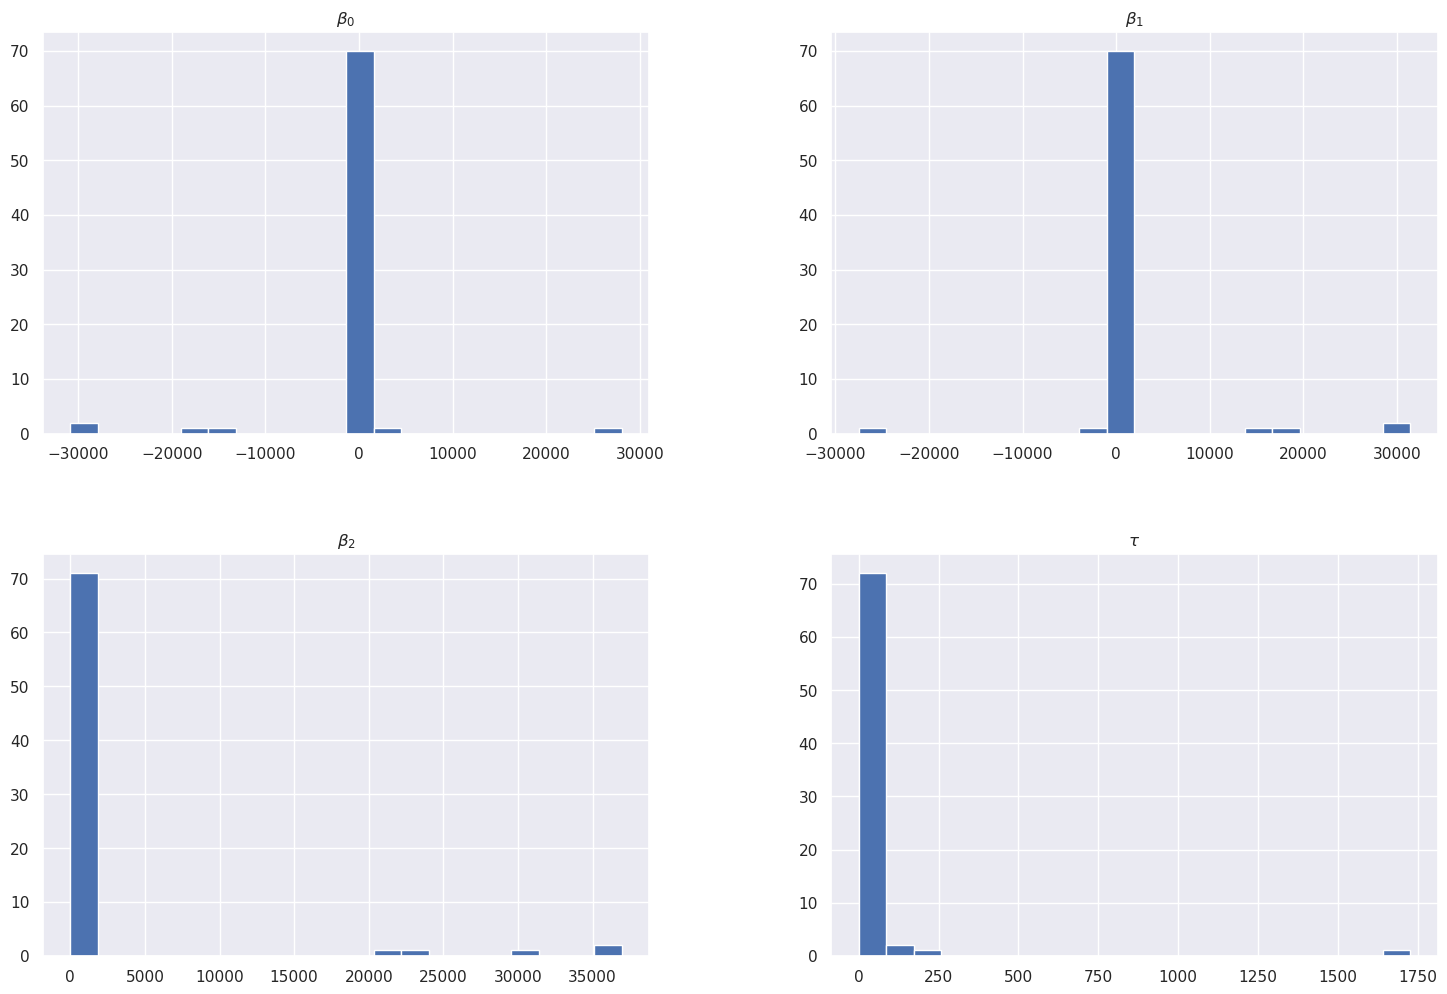

In [26]:
data.iloc[:, :].hist(figsize=(18, 12), bins=20)

In [27]:
data = data.loc[data["$\\beta_0$"] > -10000]
data = data.loc[data["$\\beta_1$"] > -50000]
data = data.loc[data["$\\beta_2$"] < 50000]
data = data.loc[data["$\\tau$"] < 250]

array([[<Axes: title={'center': '$\\beta_0$'}>,
        <Axes: title={'center': '$\\beta_1$'}>],
       [<Axes: title={'center': '$\\beta_2$'}>,
        <Axes: title={'center': '$\\tau$'}>]], dtype=object)

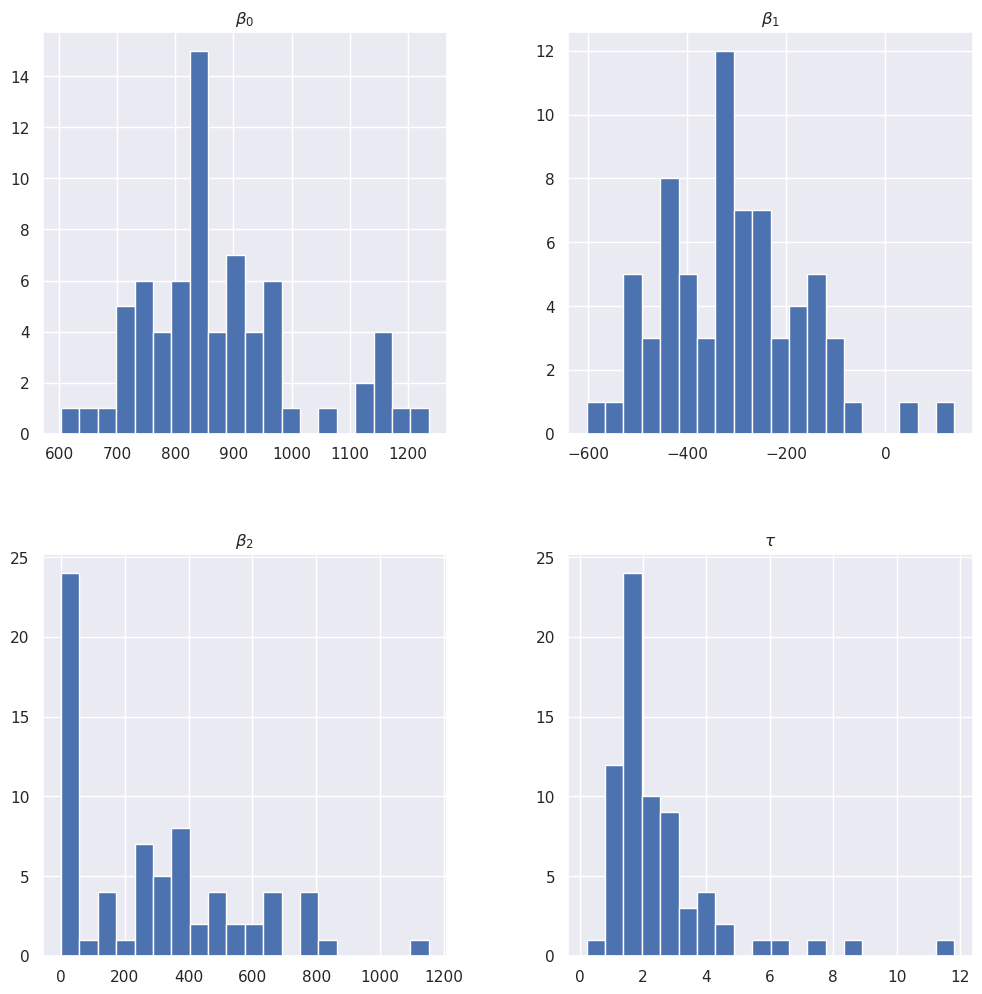

In [34]:
sns.set(rc={"figure.figsize":(12, 12)})
data.iloc[:, :].hist(figsize=(12, 12), bins=20)

In [30]:
data = data.loc[data["$\\beta_0$"] < 1500]
data = data.loc[data["$\\beta_1$"] > -740]
data = data.loc[data["$\\beta_2$"] < 50000]
data = data.loc[data["$\\tau$"] < 250]

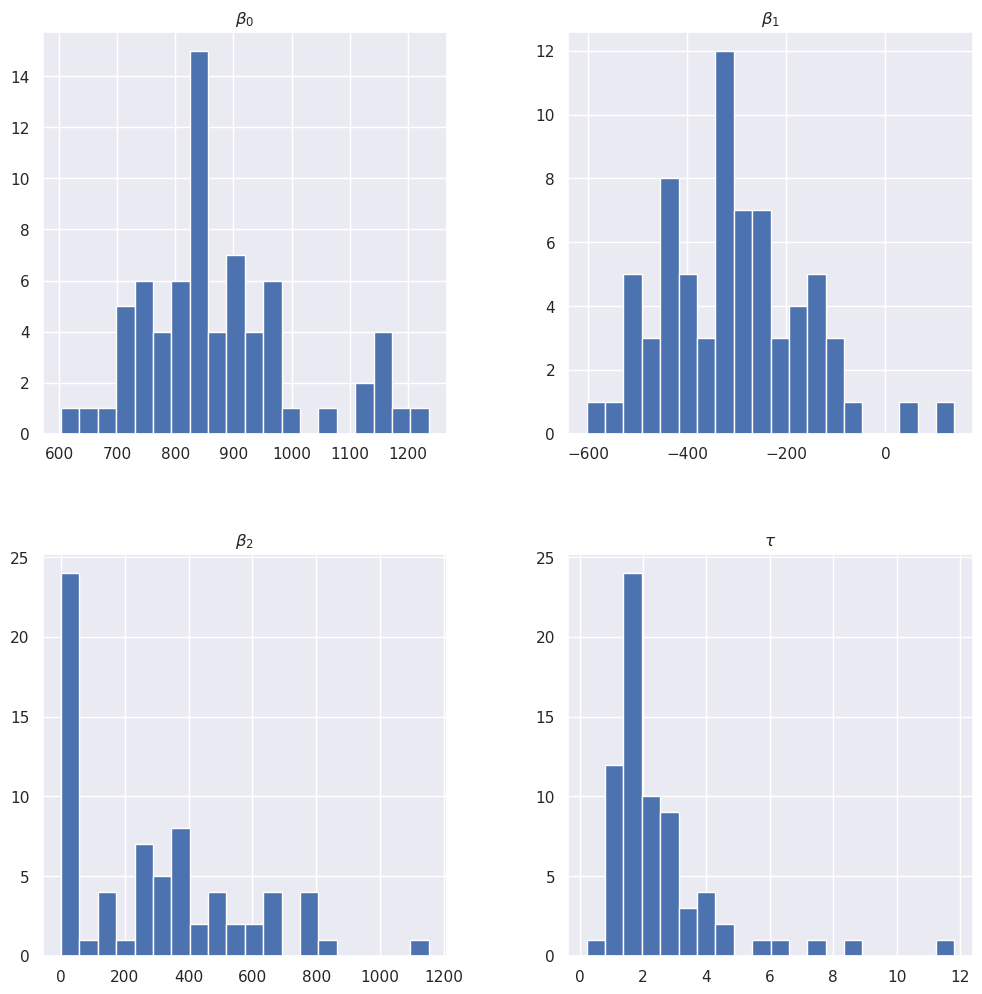

In [36]:
sns.set(rc={"figure.figsize":(12, 12)})
data.iloc[:, :].hist(figsize=(12, 12), bins=20)
plt.savefig("factorsAfterDrop.pdf")

In [ ]:
data.to_csv('coefsDrops.csv')

In [ ]:
def plotZCY(beta0, beta1, beta2, tau, message):
    def Pr(time):
        return beta0 + (beta1 + beta2) * (tau / time) * (1 - np.exp(- time / tau)) - beta2 * np.exp(- time / tau)
    
    t = np.array([0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 7, 10])
    plt.plot(t, Pr(t), label=message)


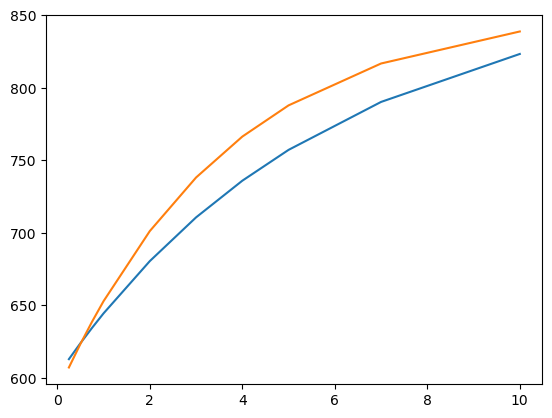

In [ ]:
plotZCY(908.3054, -306.9439, 153.7436, 4.886280, str('forcast'))
plotZCY(850.1948, -260.45017, 2.864606e+02, 3.7998988, str('real data'))

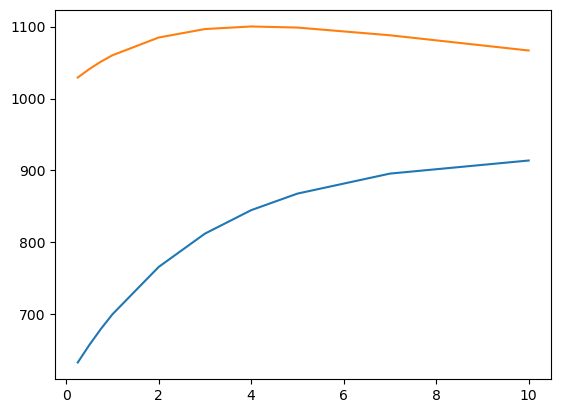

In [ ]:
plotZCY(927.7658, -321.4714, 301.1850, 2.801699, 'real data')
plotZCY(956.4742, 59.24272, 3.833796e+02, 2.8244251, 'forcast')

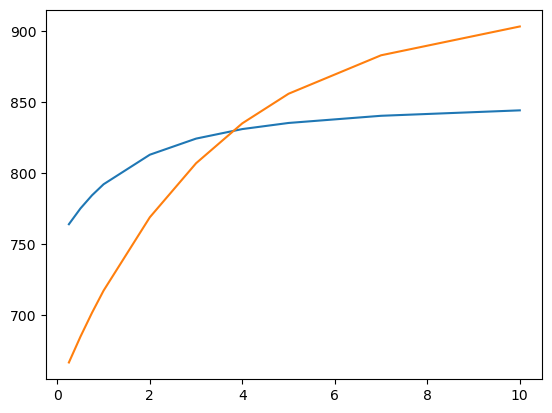

In [ ]:
plotZCY(852.9332, -102.46299, -3.655515e-03, 0.8716030, 'real data')
plotZCY(928.8630, -281.9620, 225.8354, 3.110177, 'forcast')